### Importing all the Libraries for Data Reading, Data preprocessing and Feature Engineering  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

### Importing all the Libraries for Standardising , normalising and model training , and TRain test split .

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Reading the Diabetes Dataset 

In [3]:
df = pd.read_csv("diabetes-2-1.csv")

### Reading the Dataset with fuction. head()

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking the rows and columns present in the dataset

In [5]:
df.shape

(768, 9)

### Displaying the precise summary of Datasets i.e columns ,Datatypes, memory info 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Checking the null values and its sum for each column in Dataset

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As it can be seen there are no null values present in the dataset 

### Analysing the descriptive statistics of the Dataset

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It is important to note that the values of certain columns in the data other than "Pregnancies" such as "Glucose", "Blood Pressure", "Skin Thickness", "Insulin" and  "BMI", cannot be zero. Therefore, if any of these values are recorded as zero, it indicates an inconsistency in the data. To overcome this, we will replace the zero values with the mean value of each variable.


### Replacing the 0 value with np.nan so that we can replace nan with mean values 

In [9]:
zero_columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[zero_columns]= df[zero_columns].replace(0,np.nan)


### Replacing nan with mean values


In [10]:
df.fillna(df.mean(),inplace=True)

In [11]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As now, we can see that the 0 values are replaced with the mean values of each columns.

### As the dataset is ready , lets find out the correlation between each variables 

In [12]:
correlation_matrix =df.corr()
correlation_matrix


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


### Lets check the correlation matrix on heatmap.

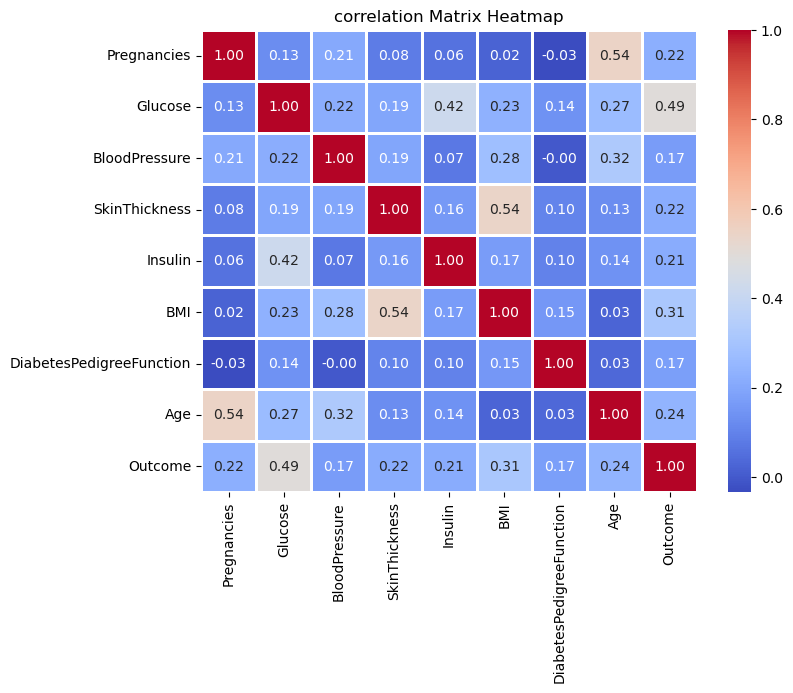

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidth=2,linecolor="white",fmt=".2f")
plt.title("correlation Matrix Heatmap")
plt.savefig("Diabetes_correlation_matrix_heatmap.png")
plt.show()


### Checking correlation matrix with Dependent Variable "Outcome " and Independent Variables

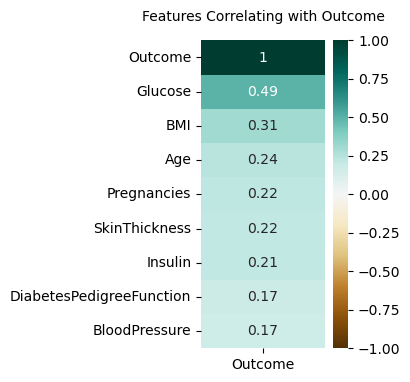

In [14]:
plt.figure(figsize=(2, 4))
heatmap = sns.heatmap(df.corr()[['Outcome']].sort_values(by='Outcome', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Outcome', fontdict={'fontsize':10}, pad=14)
plt.savefig("Features Correlating with outcome Diabetes.png")


It can be seen that Glucose is highly correlated, while Bloodpressure and DiabetesPedigreeFunction have a weaker correlation with the dependent variable "Outcome."

### exploring the features using pairplot 

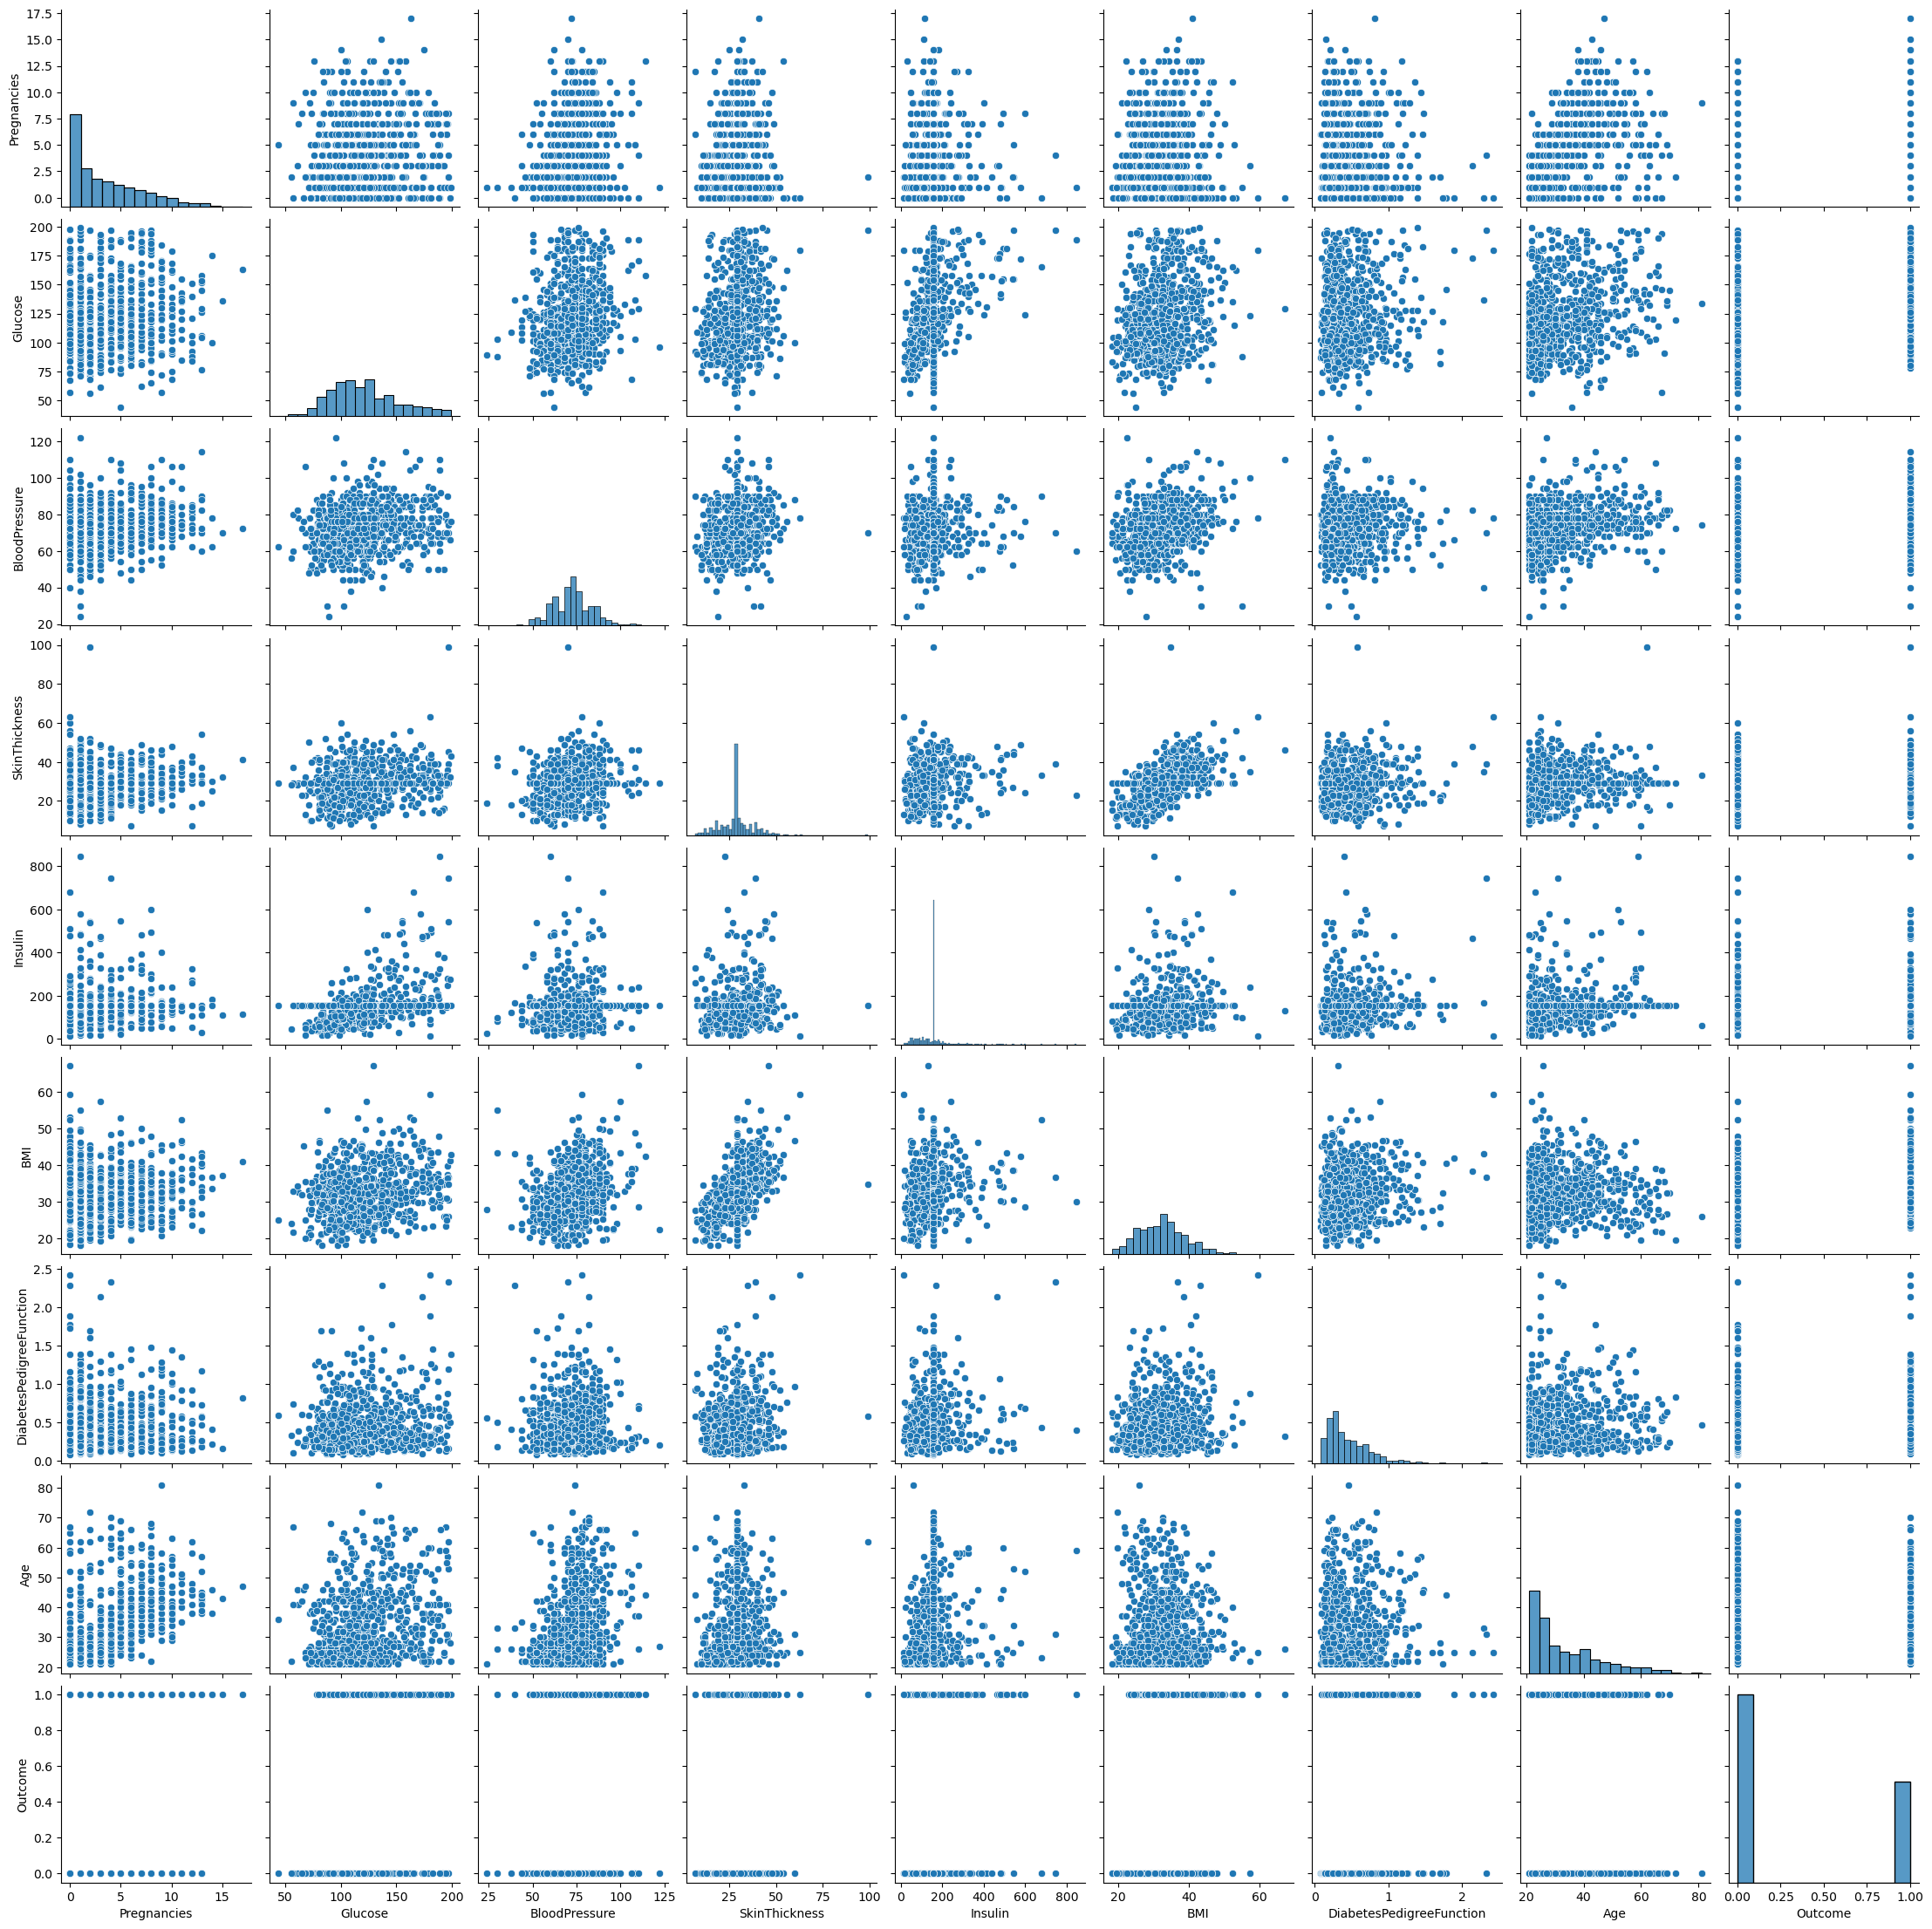

In [15]:
sns.pairplot(df)

### exploring the features using histplot

<Figure size 1500x1100 with 0 Axes>

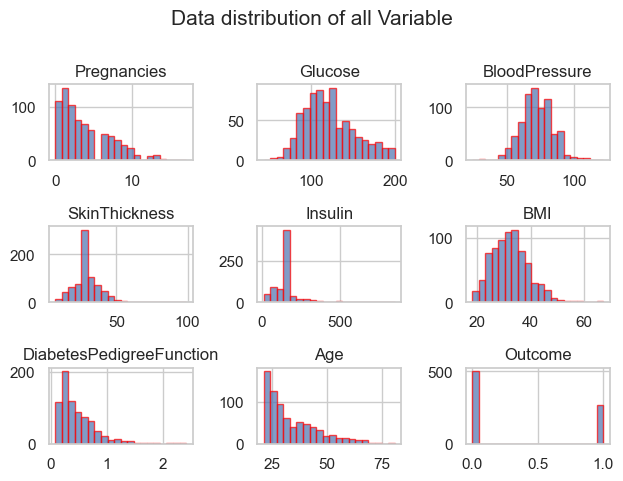

In [15]:
sns.set(style="whitegrid")
Each_variable_plot = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(15,11))
df[Each_variable_plot].hist(bins=20,edgecolor="Red",grid=True,alpha=0.7)
plt.suptitle("Data distribution of all Variable",y=1.0,fontsize=15)
plt.tight_layout()
plt.savefig("Data distribution of all Variable.png")
plt.show()


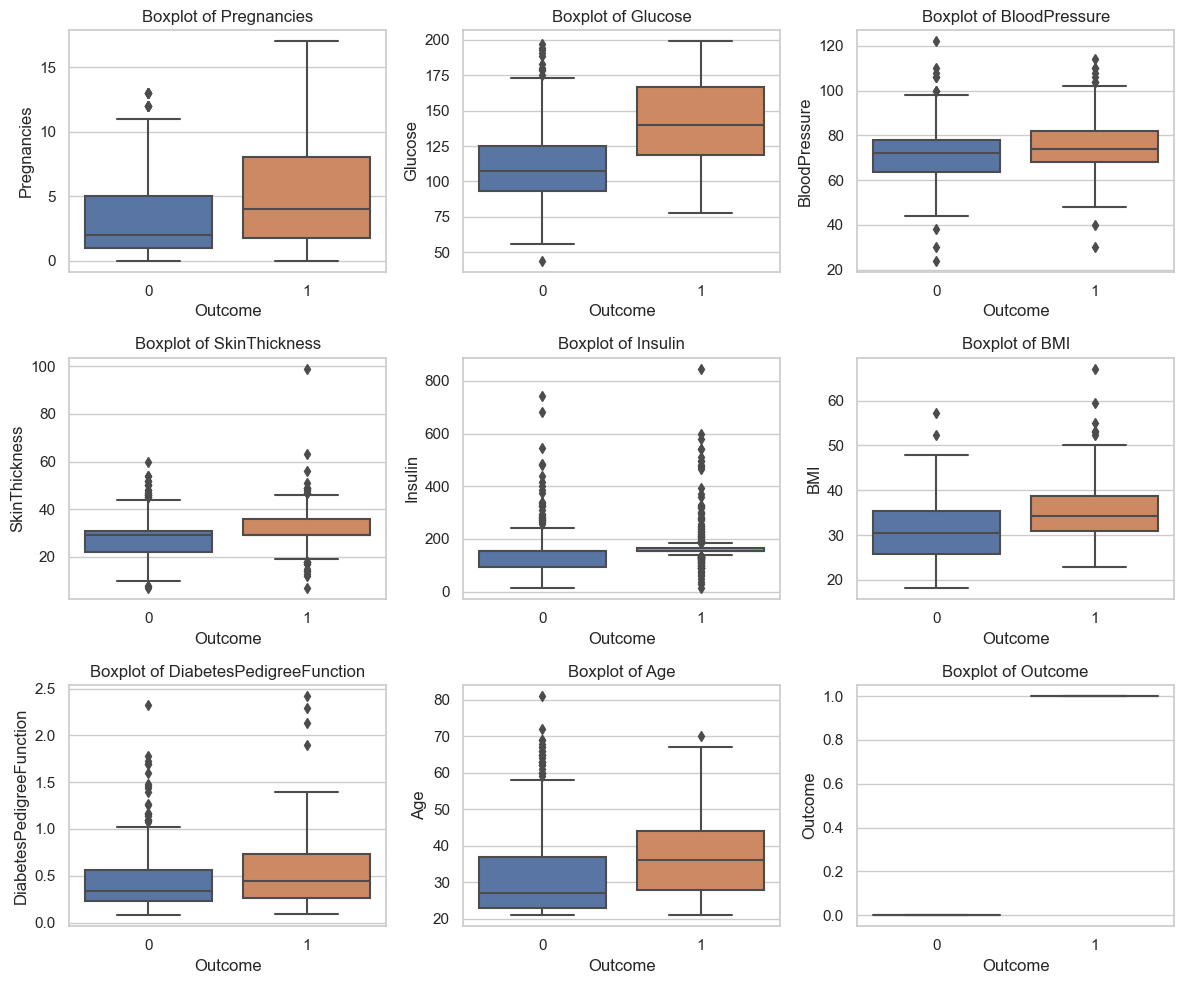

In [16]:
#Setting the figure size
plt.figure(figsize=(12,10))

#using For loop to iterate through each variable in dataset
for i, column in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(3,3,i +1)
    sns.boxplot(x='Outcome', y=column,data=df)
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.savefig("Box Plot2.png")
plt.show()


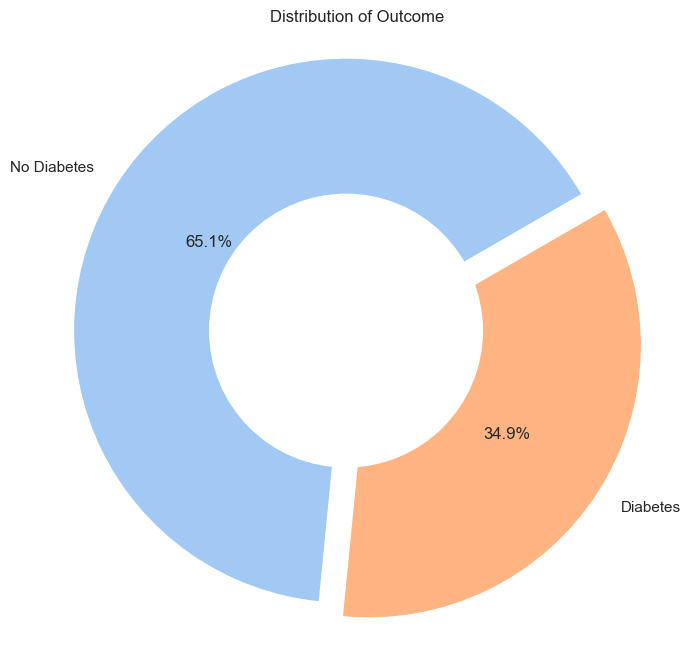

In [17]:
Outcome_tally= df["Outcome"].value_counts()
lables_1=['No Diabetes','Diabetes']
plt.figure(figsize=(8,8))
exp=[0,0.1] # Used to evelate the circle slice.
plt.pie(Outcome_tally,labels=lables_1,autopct='%1.1f%%',startangle=30,colors=sns.color_palette('pastel'),explode=exp)

#adding a Circle at the centre to look like. donut chart
centre_circle=plt.Circle((0,0),0.50,fc="white")
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Distribution of Outcome')
plt.savefig("Distribution of Outcome.png")
plt.show()

## DATA PREPROCESSING 


### Splitting the data in X( Independent Variables) and y( Dependent Variable)

In [18]:
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Performing Train/Test Split on X and y 

In [21]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=14)

### Standardising the Variables

In [22]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
X_train 

array([[-1.13509608,  1.75617272, -1.07666907, ...,  0.27381375,
         1.80652511, -1.03960266],
       [ 0.03723192, -1.28796294,  1.14694027, ..., -0.48845334,
        -0.46637717,  0.06225744],
       [-1.13509608,  1.85332598,  1.48903402, ...,  0.54707931,
        -0.47540857,  0.14701591],
       ...,
       [-1.13509608, -0.67265893, -1.76085657, ..., -1.09251405,
        -1.18587868, -1.03960266],
       [ 1.20955991, -0.89934988, -0.05038784, ...,  0.59022651,
         0.03938122,  2.01170224],
       [-1.13509608, -0.12212375, -0.01573509, ..., -0.042599  ,
        -0.99621929, -0.78532725]])

In [24]:
X_test

array([[ 2.91318537, -0.40465003, -0.12357623, ...,  0.41804687,
        -0.67526571,  1.63008142],
       [-0.23068672, -2.00706416,  0.76353053, ...,  0.44907841,
        -0.69974208,  1.11141915],
       [ 1.02686212,  1.16215489,  0.46782828, ...,  0.57320458,
         0.67399421,  1.80296884],
       ...,
       [-0.85946114, -0.72513286, -0.56712961, ..., -2.06447651,
        -0.52840749, -1.04967364],
       [-1.17384835, -1.54414452, -1.45423638, ..., -0.57496248,
        -0.62019388, -0.96322993],
       [ 0.3980877 ,  1.05532728,  0.24605159, ..., -0.24913129,
        -0.11536874, -0.44456766]])

## Model Deployment 

### Making New columns for the Performance metrics for Models

In [25]:
models = pd.DataFrame(columns=["Model","Accuracy","Sensitivity","Specificity"])

In [26]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve


### Defining Sensitivity and Specificity to use for all Models 

In [27]:
def sensitivity(y_true, y_pred):
    
    TP = sum((y_true == 1) & (y_pred == 1))
    FN = sum((y_true == 1) & (y_pred == 0))
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    return sensitivity

def specificity(y_true, y_pred):

    TN = sum((y_true == 0) & (y_pred == 0))
    FP = sum((y_true == 0) & (y_pred == 1))
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    return specificity


### Defining Confusion Matrix Visualisation for models 

In [28]:
def plot_confusion_matrix(Y_test, y_pred, model_name):
    cm = confusion_matrix(Y_test, y_pred)
    group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

### Defining the Precision-recall curve visualisation plot for models 

In [29]:
def plot_precision_recall_curve(recall, precision, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='*', label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

### 1) Logistic Regression Model, Training and Evalution

In [30]:
from sklearn import linear_model
logistic_Regression_model=linear_model.LogisticRegression()
logistic_Regression_model.fit(X_train, y_train)

LogisticRegression()

Test set Accuracy( Percentage) : 72.72727272727273
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       101
           1       0.62      0.53      0.57        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154

------------------------------------------------------------
Sensitivity (Percentage) : 52.83018867924528
Specificity (percentage): 83.16831683168317
------------------------------------------------------------


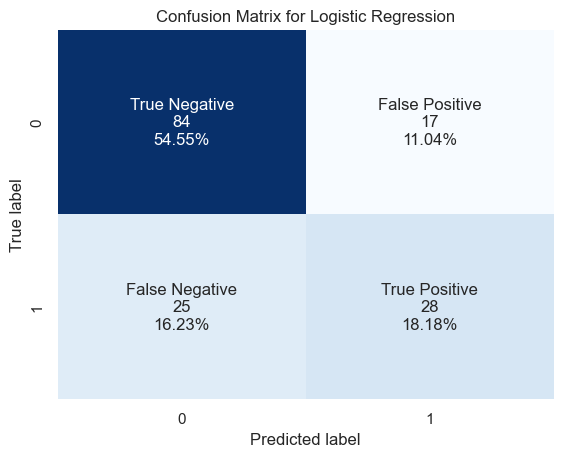

/var/folders/8z/qfjrwx4n19qcy9njkm62193c0000gn/T/ipykernel_16841/1555319433.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [31]:
y_log_pred=logistic_Regression_model.predict(X_test)
log_accuracy=accuracy_score(y_test, y_log_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_log_pred)
print("Test set Accuracy( Percentage) : "  +str(accuracy_score(y_test,y_log_pred)*100))
print("-"*60)
print(classification_report(y_test, y_log_pred))
print("-"*60)
sen = sensitivity(y_test, y_log_pred)*100
spec = specificity(y_test, y_log_pred)*100
print("Sensitivity (Percentage) :",  sen)
print("Specificity (percentage):",  spec)
print("-"*60)

plot_confusion_matrix(y_test, y_log_pred, 'Logistic Regression')

new_row = {"Model": "Logistiv Regression","Accuracy": str(accuracy_score(y_test,y_log_pred)*100), "Sensitivity" : sen,"Specificity" :spec }
models = models.append(new_row, ignore_index=True)


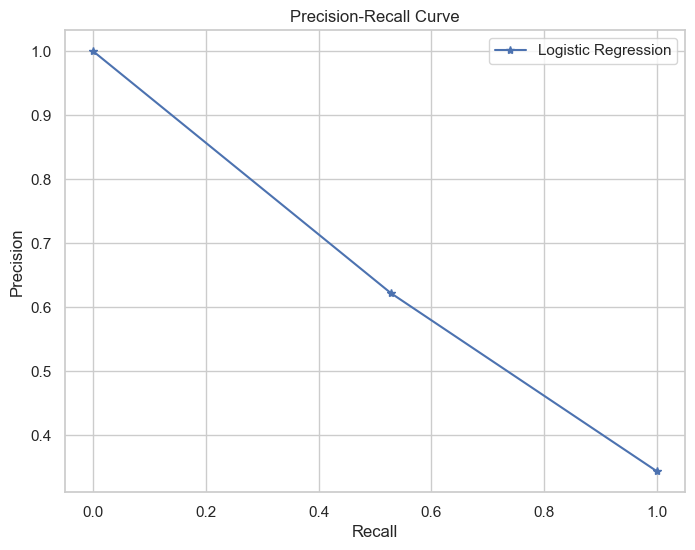

In [32]:

plot_precision_recall_curve(recall, precision, "Logistic Regression")


### 2) Random Forest Classifier Predictions and Evaluation

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=102, random_state=14)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=102, random_state=14)

Test set Accuracy (Percentage) : 73.37662337662337
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       101
           1       0.62      0.60      0.61        53

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

------------------------------------------------------------
Sensitivity (Percentage) : 60.37735849056604
Specificity (Percentage) : 80.19801980198021
------------------------------------------------------------


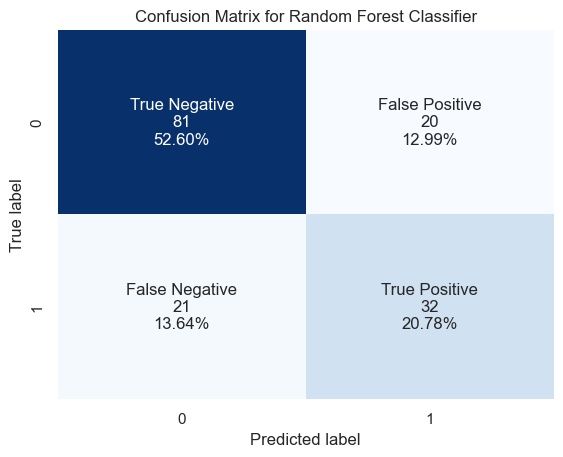

/var/folders/8z/qfjrwx4n19qcy9njkm62193c0000gn/T/ipykernel_16841/2005849727.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [34]:
y_rfc_pred=rfc.predict(X_test)
precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_rfc_pred)
rfc_accuracy=accuracy_score(y_test, y_rfc_pred)
print("Test set Accuracy (Percentage) : "  +str(accuracy_score(y_test,y_rfc_pred)*100))
print("-"*60)
print(classification_report(y_test, y_rfc_pred))
print("-"*60)
sen1 = sensitivity(y_test, y_rfc_pred)*100
spec1 = specificity(y_test, y_rfc_pred)*100
print("Sensitivity (Percentage) :",  sen1)
print("Specificity (Percentage) :",  spec1)
print("-"*60)

plot_confusion_matrix(y_test, y_rfc_pred, 'Random Forest Classifier')

new_row = {"Model": "RF Classifier","Accuracy": str(accuracy_score(y_test,y_rfc_pred)*100), "Sensitivity" : sen1,"Specificity" :spec1 }
models = models.append(new_row, ignore_index=True)



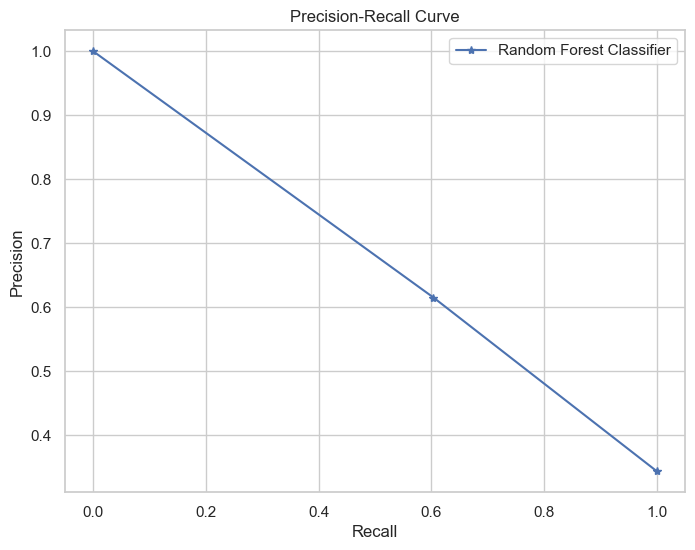

In [35]:
plot_precision_recall_curve(recall1, precision1, "Random Forest Classifier")

### 3) KNN Model Predictions and Evaluation


In [36]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

Test set Accuracy (Percentage) : 77.92207792207793
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       101
           1       0.68      0.68      0.68        53

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

------------------------------------------------------------
Sensitivity (Percentage): 67.9245283018868
Specificity (Percentage): 83.16831683168317
------------------------------------------------------------


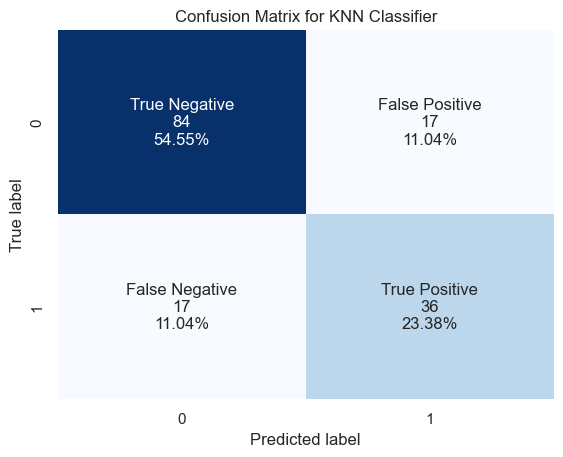

/var/folders/8z/qfjrwx4n19qcy9njkm62193c0000gn/T/ipykernel_16841/2226596817.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [37]:
y_knn_pred=knc.predict(X_test)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_knn_pred)
knn_accuracy=accuracy_score(y_test, y_knn_pred)
print("Test set Accuracy (Percentage) : "  +str(accuracy_score(y_test,y_knn_pred)*100))
print("-"*60)
print(classification_report(y_test, y_knn_pred))
print("-"*60)
sen2 = sensitivity(y_test, y_knn_pred)*100
spec2 = specificity(y_test, y_knn_pred)*100
print("Sensitivity (Percentage):",  sen2)
print("Specificity (Percentage):",  spec2)
print("-"*60)

plot_confusion_matrix(y_test, y_knn_pred, 'KNN Classifier')

new_row = {"Model": "KNN Classifier","Accuracy": str(accuracy_score(y_test,y_knn_pred)*100), "Sensitivity" : sen2,"Specificity" :spec2 }
models = models.append(new_row, ignore_index=True)




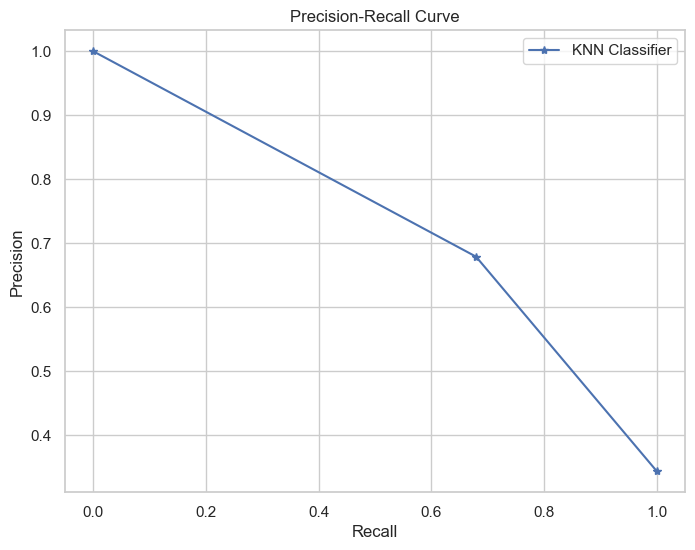

In [38]:
plot_precision_recall_curve(recall2, precision2, "KNN Classifier")

### 4) Support Vector Machine Model Training and Evaluation

In [39]:
from sklearn.svm import SVC
svm_clf= SVC(C=1, gamma=0.01,kernel= 'rbf')
svm_clf.fit(X_train, y_train)


SVC(C=1, gamma=0.01)

Test set Accuracy (Percentage): 73.37662337662337
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       101
           1       0.65      0.49      0.56        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154

------------------------------------------------------------
Sensitivity (Percentage): 49.056603773584904
Specificity (Percentage): 86.13861386138613
------------------------------------------------------------


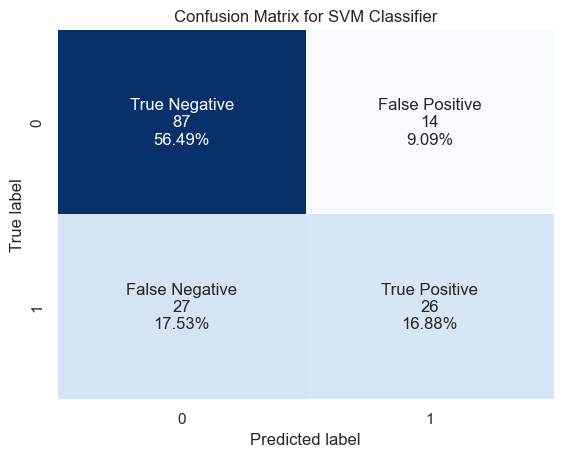

/var/folders/8z/qfjrwx4n19qcy9njkm62193c0000gn/T/ipykernel_16841/1115629034.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [40]:
y_svm_pred=svm_clf.predict(X_test)
precision3, recall3, thresholds3 = precision_recall_curve(y_test, y_svm_pred)
svm_accuracy=accuracy_score(y_test, y_svm_pred)
print("Test set Accuracy (Percentage): "  +str(accuracy_score(y_test,y_svm_pred)*100))
print("-"*60)
print(classification_report(y_test, y_svm_pred))
print("-"*60)
sen3 = sensitivity(y_test, y_svm_pred)*100
spec3 = specificity(y_test, y_svm_pred)*100
print("Sensitivity (Percentage):",  sen3)
print("Specificity (Percentage):",  spec3)
print("-"*60)

plot_confusion_matrix(y_test, y_svm_pred, 'SVM Classifier')

new_row = {"Model": "SVM Classifier","Accuracy": str(accuracy_score(y_test,y_svm_pred)*100), "Sensitivity" : sen3,"Specificity" :spec3 }
models = models.append(new_row, ignore_index=True)





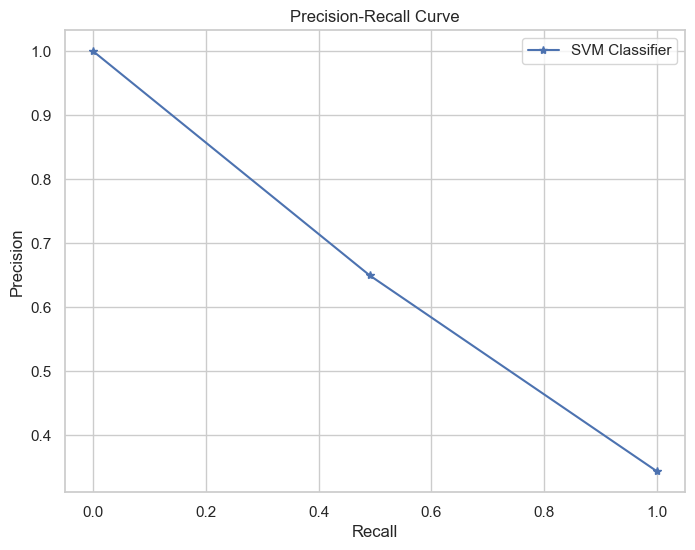

In [41]:
plot_precision_recall_curve(recall3, precision3, "SVM Classifier")

### 5) Decision Tree Model Training and Evaluation

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_leaf=2, min_samples_split=10,random_state=14)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, random_state=14)

Test set Accuracy (Percentage): 75.32467532467533
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       101
           1       0.63      0.68      0.65        53

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154

------------------------------------------------------------
Sensitivity (Percentage): 67.9245283018868
Specificity (Percentage): 79.20792079207921
------------------------------------------------------------


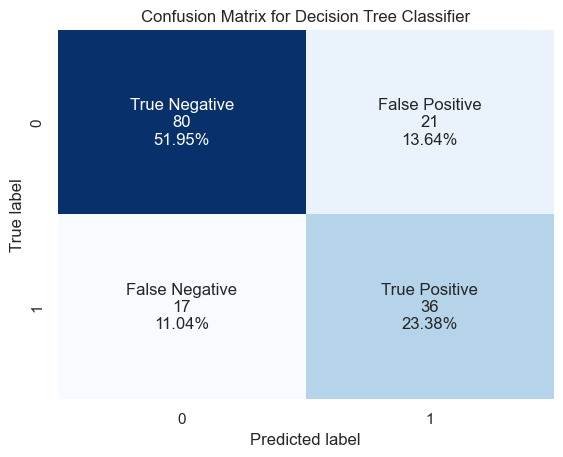

/var/folders/8z/qfjrwx4n19qcy9njkm62193c0000gn/T/ipykernel_16841/2532318347.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [43]:
y_dtc_pred=dtc.predict(X_test)
precision4, recall4, thresholds4 = precision_recall_curve(y_test, y_dtc_pred)
dtc_accuracy=accuracy_score(y_test, y_dtc_pred)
print("Test set Accuracy (Percentage): "  +str(accuracy_score(y_test,y_dtc_pred)*100))
print("-"*60)
print(classification_report(y_test, y_dtc_pred))
print("-"*60)
sen4 = sensitivity(y_test, y_dtc_pred)*100
spec4 = specificity(y_test, y_dtc_pred)*100
print("Sensitivity (Percentage):",  sen4)
print("Specificity (Percentage):",  spec4)
print("-"*60)

plot_confusion_matrix(y_test, y_dtc_pred, 'Decision Tree Classifier')

new_row = {"Model": "Decision Tree Classifier","Accuracy": str(accuracy_score(y_test,y_dtc_pred)*100), "Sensitivity" : sen4,"Specificity" :spec4 }
models = models.append(new_row, ignore_index=True)






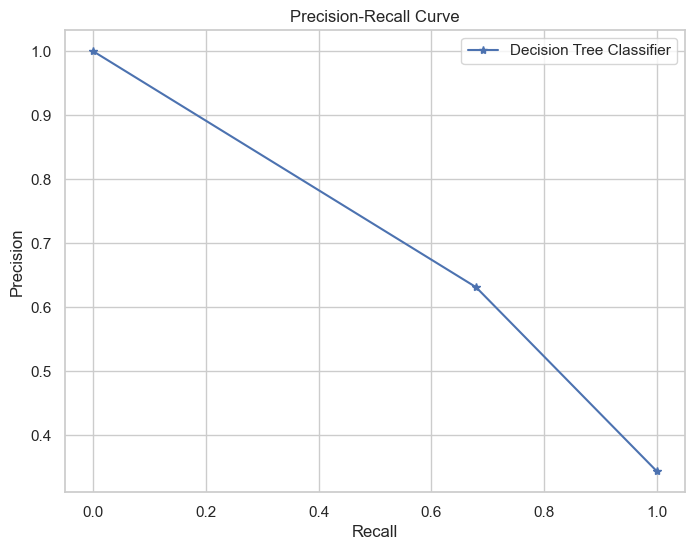

In [44]:
plot_precision_recall_curve(recall4, precision4, "Decision Tree Classifier")

### All Values ( Accuarcy , Sensitivity, Specificity )  are appneded in models Dataframe. 

In [45]:
models.sort_values(by = 'Accuracy', ascending= False)


,Model,Accuracy,Sensitivity,Specificity
2,KNN Classifier,77.92207792207793,67.924528,83.168317
4,Decision Tree Classifier,75.32467532467533,67.924528,79.207921
1,RF Classifier,73.37662337662337,60.377358,80.198020
3,SVM Classifier,73.37662337662337,49.056604,86.138614
0,Logistiv Regression,72.72727272727273,52.830189,83.168317


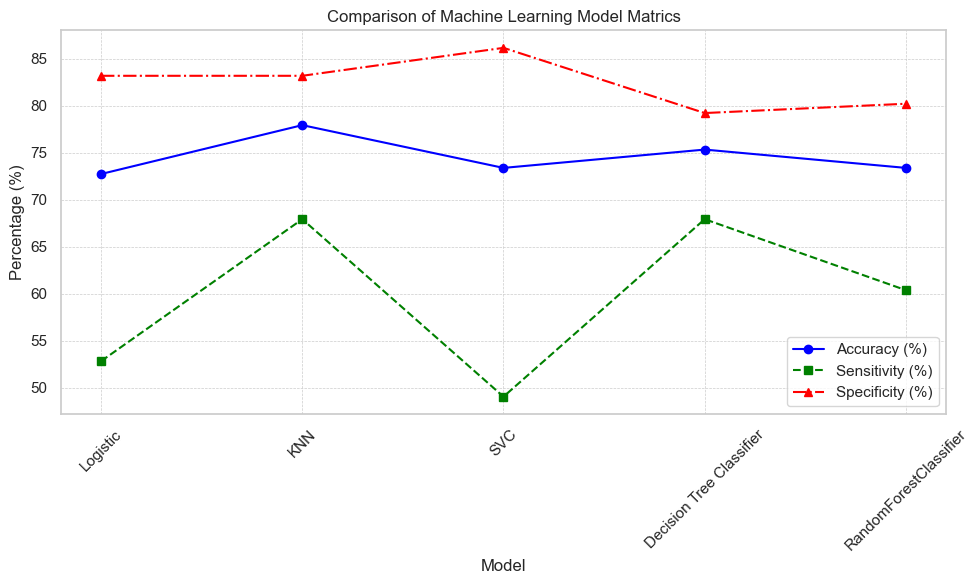

In [46]:
#Let's display our models accuracy, sensitivity, specificity with line graph to understand it 
models=['Logistic','KNN', 'SVC',  'Decision Tree Classifier','RandomForestClassifier']
accuracy=[72.7272,77.9220,73.3766,75.3246,73.3766]
sensitivity=[52.8301, 67.9245, 49.0566, 67.9245, 60.3773]
specificity=[83.1683, 83.1683, 86.1386, 79.2079, 80.1980]

x_axis = np.arange(len(models))

# Plotting accuracy, sensitivity and specifivity 
plt.figure(figsize=(10, 6))
plt.plot(x_axis, accuracy, label='Accuracy (%)', marker='o', linestyle='-', color='blue')
plt.plot(x_axis, sensitivity, label='Sensitivity (%)', marker='s', linestyle='--', color='green')
plt.plot(x_axis, specificity, label='Specificity (%)', marker='^', linestyle='-.', color='red')

# Adding details to the plot
plt.title('Comparison of Machine Learning Model Matrics')
plt.xlabel('Model')
plt.ylabel('Percentage (%)')
plt.xticks(x_axis, models, rotation=45)
plt.legend()

# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()

plt.savefig("Box Plot.png")

plt.show()

## Thank you 